In [3]:
# Constant tensors and variables

import tensorflow as tf

x = tf.ones(shape=(2,1))
print(x)

x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [4]:
# random tensors

x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.1404459 ]
 [ 0.25944585]
 [-0.04499486]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0, maxval=1)
print(x)

tf.Tensor(
[[0.26736474]
 [0.20645761]
 [0.12815416]], shape=(3, 1), dtype=float32)


In [6]:
# tensors are not assignable again, they are constants, but we can do that in NumPy
#but we need a way to update state, that's where variables come in tf.Variable

v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)


# assign can be using assign method:
v.assign(tf.ones((3,1)))

v[0,0].assign(3.)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.1295432 ],
       [-0.46418825],
       [-0.01596028]], dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [7]:
# using assign_add()
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [8]:
# tensor operations: doing math in TF

a = tf.ones((2,2))

b = tf.square(a)
c = tf.sqrt(a)
d = b+c
e = tf.matmul(a, b)
e *= d

print(a)
print(b)
print(c)
print(d)
print(e)


tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [9]:
# we can find gradient of any differentiable expression with respect to any of its inputs

input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [10]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [11]:
# gradient tapes to compute second order gradients

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [12]:
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]],size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)


In [13]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[ 0.5553568 ,  4.68297   ],
       [-1.4947749 ,  3.6418052 ],
       [-1.034792  ,  2.081979  ],
       ...,
       [ 2.0301054 , -0.49502546],
       [ 3.8108003 ,  0.27878973],
       [ 3.671676  ,  0.7694259 ]], dtype=float32)

In [14]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), 
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets)


[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


(2000, 2)
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


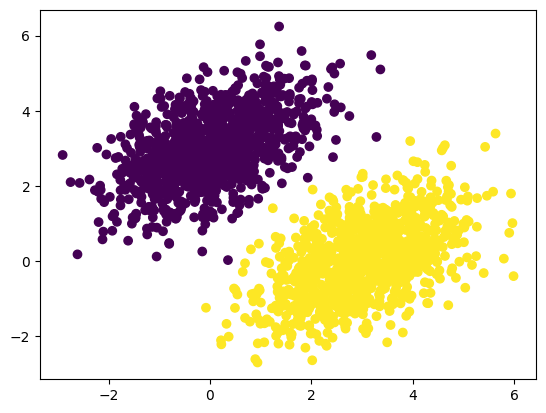

In [18]:
print(inputs.shape)
print(targets)
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [19]:
# creating linear classifier variables

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
print(W)
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(b)

# forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.8509979],
       [0.9266192]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [22]:
# training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [23]:
# batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 7.5173
Loss at step 1: 1.1174
Loss at step 2: 0.2995
Loss at step 3: 0.1785
Loss at step 4: 0.1522
Loss at step 5: 0.1395
Loss at step 6: 0.1294
Loss at step 7: 0.1204
Loss at step 8: 0.1121
Loss at step 9: 0.1046
Loss at step 10: 0.0977
Loss at step 11: 0.0915
Loss at step 12: 0.0857
Loss at step 13: 0.0805
Loss at step 14: 0.0757
Loss at step 15: 0.0713
Loss at step 16: 0.0672
Loss at step 17: 0.0636
Loss at step 18: 0.0602
Loss at step 19: 0.0571
Loss at step 20: 0.0543
Loss at step 21: 0.0518
Loss at step 22: 0.0494
Loss at step 23: 0.0473
Loss at step 24: 0.0453
Loss at step 25: 0.0435
Loss at step 26: 0.0419
Loss at step 27: 0.0404
Loss at step 28: 0.0390
Loss at step 29: 0.0378
Loss at step 30: 0.0366
Loss at step 31: 0.0356
Loss at step 32: 0.0346
Loss at step 33: 0.0337
Loss at step 34: 0.0329
Loss at step 35: 0.0322
Loss at step 36: 0.0315
Loss at step 37: 0.0309
Loss at step 38: 0.0304
Loss at step 39: 0.0299


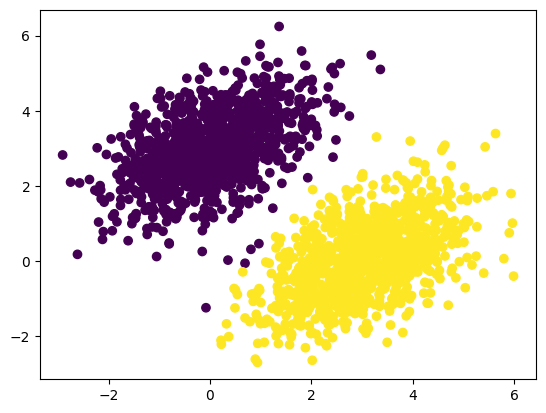

In [24]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show()

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.18516795],
       [-0.11644365]], dtype=float32)>


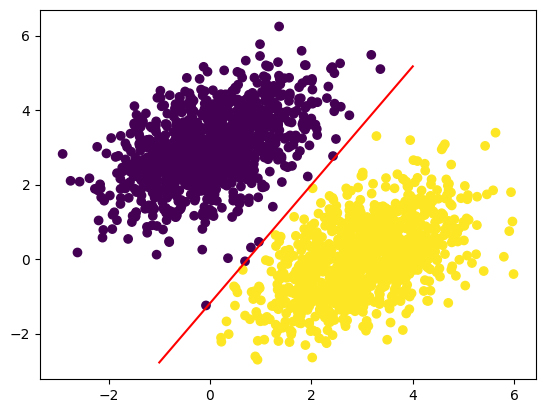

: 

In [ ]:
x = np.linspace(-1, 4, 100)
print(W)
y = - W[0] /W[1] * x + (0.5-b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)